# Import necessary libraries

In [1]:
import keras
# from keras import regularizers
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, BatchNormalization
from keras.datasets import cifar100
# from keras import optimizers
from keras.utils import to_categorical
from matplotlib import pyplot as plt

import numpy as np
# from keras import backend as k
# from tensorflow.keras.losses import categorical_crossentropy
# from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import Callback, EarlyStopping
import tensorflow as tf
import datetime, os

In [2]:
# Load our previous training model
from keras.models import load_model

# Load the saved model
model = load_model('best_conv.h5')

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 15, 15, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0

In [3]:
# Load the training history
import h5py

# Load the history from the .h5 file
with h5py.File('C:\\Users\\Brett\\PycharmProjects\\CV_Assignment1\\best_conv.h5', 'r') as file:
    print("Available datasets in the file:")
    for dataset_name in file.keys():
        print(dataset_name)

Available datasets in the file:
model_weights
optimizer_weights


# Load training data

In [4]:
batch_size = 128
num_classes = 100
epochs = 200

# Load data and view the shapes
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

x_train original shape (50000, 32, 32, 3)
y_train original shape (50000, 1)


In [5]:
img_width, img_height, img_num_channels = x_train.shape[1:4]
input_shape = (img_width, img_height, img_num_channels)

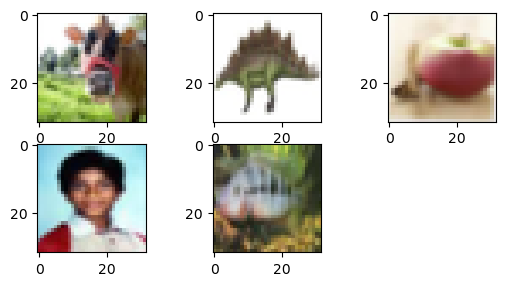

In [6]:
# Visualize the first 5 elements in our data
for i in range(5):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')

# Format the data for training


- Converting to float32 and performing normalization ensures our data is in the correct format for our neural network.



In [7]:
# 1. Conversion of the dataset to float 32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# 2. Normalization
# This function normalize inputs for zero mean and unit variance
# It is used when training a model.
# Input: training set and test set
# Output: normalized training set and test set according to the training set statistics.
mean = np.mean(x_train, axis=(0, 1, 2, 3))
std = np.std(x_train, axis=(0, 1, 2, 3))
print(mean)
print(std)
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

121.93584
68.38902
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


One-Hot format: Represent categorical variables as binary vectors. It is used for the multi-class classification problems.

* "cat" -> [1, 0, 0]
* "dog" -> [0, 1, 0]
* "bird" -> [0, 0, 1]

In [8]:
# Modify the label vectors to be in the one-hot format (fill out below)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Build a sequential convolutional model

In [9]:
model = Sequential()

# first block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# second block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# third block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# flatten to 1D vector
model.add(Flatten())
model.add(BatchNormalization())

# output layer
model.add(Dense(num_classes, activation='softmax'))  # 100 classes in CIFAR-100

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 15, 15, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0

In [8]:
# !pip install git+https://github.com/paulgavrikov/visualkeras --upgrade

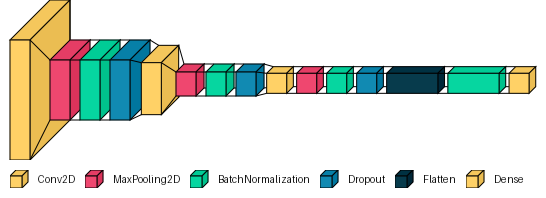

In [9]:
import visualkeras
visualkeras.layered_view(model, legend=True)

# Compile the model
- Choose your loss, optimizers, and any other metrics (e.g. Training accuracy, Test accuracy)

In [10]:
from keras import optimizers
learning_rate = 0.1
lr_decay = 1e-6
lr_drop = 20

# # Optimization details
sgd = optimizers.SGD(learning_rate=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Train the model

In [11]:
from keras_preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard

# Load the TensorBoard notebook extension, do not have to touch this.
%load_ext tensorboard

def lr_schedule(epoch):
    initial_lr = 0.1
    drop_factor = 0.5
    return initial_lr * (drop_factor ** (epoch // lr_drop))

reduce_lr = keras.callbacks.LearningRateScheduler(lr_schedule)

# Data augmentation
datagen = ImageDataGenerator(
    featurewise_center = False,  # set input mean to 0 over the dataset
    samplewise_center = False,  # set each sample mean to 0
    featurewise_std_normalization = False,  # divide inputs by std of the dataset
    samplewise_std_normalization = False,  # divide each input by its std
    zca_whitening = False,  # apply ZCA whitening
    rotation_range = 15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip = True,  # randomly flip images
    vertical_flip = False)  # randomly flip images

In [12]:
datagen.fit(x_train)

In [ ]:
# (std, mean, and principal components if ZCA whitening is applied).
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[reduce_lr],
    verbose=1
)

Early Stopping

* With more epochs, we can decrease our loss over time. This may lead to overfitting.
* Early stopping allows us to stop training when there is an increase in the loss value compared to the previous epoch.
* Detailed Arguments: https://keras.io/api/callbacks/early_stopping/

In [14]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8, restore_best_weights = True)

# For the TensorBoard, set the directory you want to save your log.
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S")) # log directory will be created
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=100,
    verbose=1,
    callbacks=[early_stop,tensorboard_callback],
    validation_data=(x_test, y_test)
)

Epoch 1/100
391/391 [==============================] - 13s 34ms/step - loss: 2.0399 - accuracy: 0.4562 - val_loss: 1.9162 - val_accuracy: 0.4917
Epoch 2/100
391/391 [==============================] - 12s 32ms/step - loss: 2.0252 - accuracy: 0.4621 - val_loss: 1.9155 - val_accuracy: 0.4988
Epoch 3/100
391/391 [==============================] - 14s 36ms/step - loss: 2.0107 - accuracy: 0.4656 - val_loss: 1.9042 - val_accuracy: 0.4951
Epoch 4/100
391/391 [==============================] - 14s 36ms/step - loss: 1.9993 - accuracy: 0.4654 - val_loss: 1.9147 - val_accuracy: 0.4929
Epoch 5/100
391/391 [==============================] - 13s 34ms/step - loss: 2.0039 - accuracy: 0.4644 - val_loss: 1.8881 - val_accuracy: 0.5000
Epoch 6/100
391/391 [==============================] - 13s 33ms/step - loss: 1.9945 - accuracy: 0.4668 - val_loss: 1.9766 - val_accuracy: 0.4900
Epoch 7/100
391/391 [==============================] - 13s 34ms/step - loss: 1.9886 - accuracy: 0.4685 - val_loss: 1.9091 - val_ac

In [15]:
# save the model
model.save("best_conv.h5")
print("Model saved successfully")

Model saved successfully


Basics of Tensorboard, you can change options to change the shapes of scalars.

https://colab.research.google.com/github/tensorflow/tensorboard/blob/master/docs/tensorboard_in_notebooks.ipynb

In [16]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 13396), started 4:22:47 ago. (Use '!kill 13396' to kill it.)

# Evaluate its performance

In [17]:
score = model.evaluate(x_test, y_test, batch_size=50,
                                      steps=x_test.shape[0] // 50)

print('Test loss: %.2f' % score[0])
print('Test accuracy: %.2f'% score[1])

200/200 [==============================] - 1s 5ms/step - loss: 1.8650 - accuracy: 0.4994
Test loss: 1.87
Test accuracy: 0.50


## Results

Use matplotlib to draw your results.

Test loss: 1.865030288696289 / Test accuracy: 0.49939998984336853


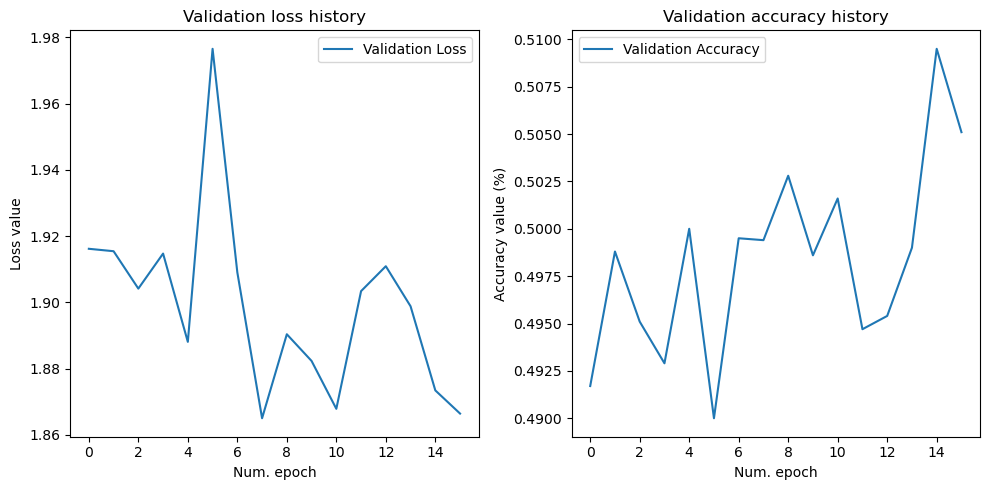

In [18]:
import matplotlib.pyplot as plt

score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

plt.figure(figsize=(10, 5))

# here we plot our validation curves as an example.

# Plot validation loss history
plt.subplot(1, 2, 1)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('Num. epoch')
plt.legend()

# Plot validation accuracy history
plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('Num. epoch')
plt.legend()

plt.tight_layout()
plt.show()

Display images and labels here.

In [19]:
class_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
    'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
    'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle',
    'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

313/313 [==============================] - 1s 4ms/step


TypeError: only size-1 arrays can be converted to Python scalars

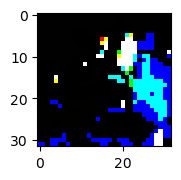

In [22]:
# Predict classes
predicted_classes = model.predict(x_test)

# Get correct and incorrect indices
correct_indices = np.nonzero(np.argmax(predicted_classes, axis=1) == np.argmax(y_test, axis=1))[0]
incorrect_indices = np.nonzero(np.argmax(predicted_classes, axis=1) != np.argmax(y_test, axis=1))[0]

# Display a few images and their labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow((x_train[i]).astype(np.uint8))
    plt.title(class_labels[int(y_train[i])])
    plt.axis('off')

plt.show()

Here is sample code to help you think through getting the string labels, rather than the one hot encoded prediction output that looks like [0,0,0,0,1,...].

In [35]:
# define the class labels, may need to look them up
class_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
    'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
    'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle',
    'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# test printing and indexing
print(class_labels[0])

predicted_classes = model.predict(x_test)

# returning the label associated with the prediction's index
def convert_to_string(predicted_classes, class_labels):
    # https://numpy.org/doc/stable/reference/generated/numpy.argmax.htmlax
    index = np.argmax(predicted_classes)
    return class_labels[index]

prediction = [...]
label = convert_to_string(prediction, class_labels)

print(label)


baby
313/313 [==============================] - 1s 3ms/step
apple
